<a href="https://colab.research.google.com/github/pauloedhuardo/pos-mvp/blob/main/MVPSprint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

**Nome:** Paulo Eduardo da Siva Santos

**Matrícula:** 4052024002093

**Dataset:** [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

### **Descrição do Problema**

O conjunto de dados Heart Disease são dados de saúde de homens e mulheres que tem por objetivo a utlização de algorítmos para detecção de doenças arteriais coronarianas baseada em indicativos fisiológicos e físicos.

### **Hipóteses do Problema**

1. Qual o gênero (homem ou mulher) mais apresentou doença cardíaca?

2. Qual a idade média presente nas amostras que apresentaram doença cardíaca?

3. A glicemia em jejum maior que 120mg/dl é um marcador do desenvolvimento da doença cardíaca?

5. Sentir algum tipo de dor no peito é um sintoma da presença de doença cardíaca?

### **Tipo de Problema**

Este é um problema de **classificação supervisionada**. Dado um conjunto de dados fisiológicos e físicos, o objetivo é prever se o paciente apresenta doença arterial coronariana.

### **Atributos do Dataset**

O dataset contém 303 amostras entre homens e mulheres e possui 14 atributos:

1. ***age*** (idade)
2. ***sex*** (sexo, sendo 1-masculino e 0-feminino)
3. ***cp*** (tipo de dor no peito, sendo 1-angina típica, 2-angina atípica, 3-dor não anginosa, 4-assintomático)
4. ***trestbps*** (pressão arterial em reposo em mm HG na admissão ao hospital)
5. ***chol*** (colesterol sérico em mg/dL)
6. ***fbs*** (glicemia de jejum > 120 mg/dL sendo 1-verdadeiro e 0-falso)
7. ***restecg*** (eletrocardiograma em repouso, sendo 0-normal, 1-com anormalidade da onda ST-T e 2-mostrando hipertrofia ventricular esquerda provável ou definitiva)
8. ***thalach*** (frequência cardíaca máxima)
9. ***exang*** (angina induzida por exercício sendo 1-sim e 0-não)
10. ***oldpeak*** (depressão do segmento ST induzida pelo exercício em relação ao repouso)
11. ***slope*** (inclinação do segmento ST de pico no exercício sendo 1-ascendente, 2-plana e 3-descendente)
12. ***ca*** (número de vasos principais coloridos pela fluoroscopia)
13. ***thal*** (talassemia sendo 3-normal, 6-defeito corrigido e 7-defeito reversível)
14. ***num*** (diagnóstico de doença arterial coronariana sendo 1-4 para doença e 0-não apresenta doença)

### **Importação das Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.model_selection import StratifiedKFold # para validação cruzada com estratificação
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.pipeline import Pipeline

### **Carga de dados**

In [2]:
# url do repositório de onde será realizado o download do dataset
url_dataset = "https://raw.githubusercontent.com/pauloedhuardo/pos-mvp/main/sprint3/data.csv"

#carregamento do dataset em um dataframe
df = pd.read_csv(url_dataset, delimiter=',')

# mostra as primeiras linhas para conferência do êxito do carregamento
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# **Análise de Dados**

Neste etapa vamos analisar os dados com objetivo de verificar a qualidade, integridade, distribuição, dados faltantes e discrepantes (outliers). Essa análise além de mostrar um panorama das informações que podem serem geradas a partir dos dados, também ajuda a definir o que precisa ser feito para preparar os dados para próxima fase (pré-proccessamento).

### **Total de instâncias e tipos dos atributos**

In [25]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:\n")
print(df.info())

Total de instâncias: 303

Tipos de dados por coluna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


Podemos observar que os atributos ca (número de vasos principais coloridos pela fluoroscopia) e thal (talassemia) não têm 303 linhas, tendo valores nulos.

### **Distribuição das características alvo da análise do problema**

#### Por Gênero:

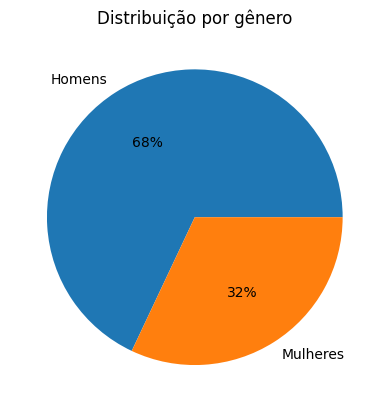

In [4]:
# quantifica os doentes do sexo masculino e feminino
genero = df['sex'].value_counts()

# cria um label para o atributo 'sex' correspondente
generos = ['Homens', 'Mulheres']

# Separa os indivíduos doentes pelo gênero
totais = [genero[1], genero[0]]

# define o título do gráfico
plt.title('Distribuição por gênero')

# cria o gráfico de pizza
plt.pie(totais, labels= generos, autopct='%1.0f%%')

# mostra o gráfico
plt.show()

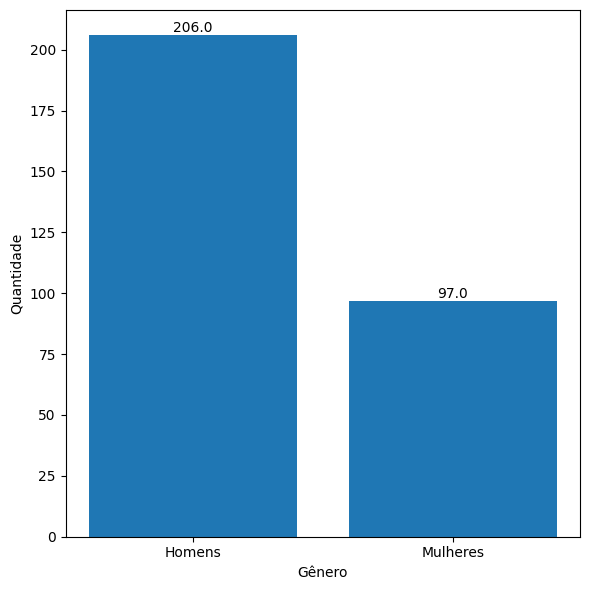

In [5]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 6 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (6, 6))

# Monta o gráfico de barras
ax.bar( x = generos, height = totais)

# Incluis os valores dos atributos sobre as barras
ax.bar_label(ax.containers[0], fmt="%.1f")

# Define o rótulos dos eixos
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

# Ajusta as margens do gráfico
plt.tight_layout()

# Mostra o gráfico
plt.show()

#### Tipo de dor no peito:

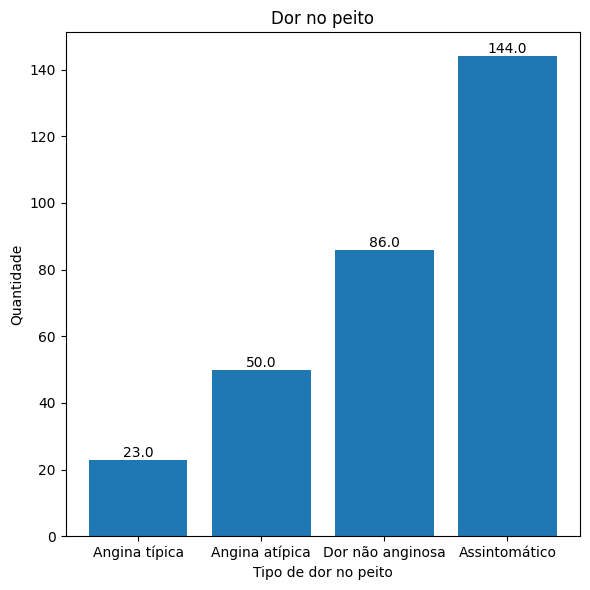

In [6]:
dor = df['cp'].value_counts()
tipoDor = ['Angina típica', 'Angina atípica', 'Dor não anginosa', 'Assintomático']
valores = [dor[1], dor[2], dor[3], dor[4]]

# Prepara a figura (fig) e a área do gráfico (ax) com largura 6 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (6, 6))

# monta o gráfico de barras
ax.bar( x = tipoDor, height = valores)

# Incluis os valores dos atributos sobre as barras
ax.bar_label(ax.containers[0], fmt="%.1f")

# Define os rótulo dos eixos
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Quantidade')

# Mostra o gráfico
plt.title('Dor no peito')

# Ajusta as margens do gráfico
plt.tight_layout()

# Mostra o gráfico
plt.show()

Do total de amostras 159 apresentam algum tipo de dor no peito, o que pode caracterizar a presença de doença cardíaca.

# **Estatística Descritiva**

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Dentro do resultado apresentado no resumo numérico das características das amostras, podemos destacar:

- A média das idades é 54 anos, sendo 29 anos para a pessoa de menor idade e 77 para a de maior idade.

- A média do colesterol sérico das amostras é 246 mg/dL, sendo que o considerado ideal é abaixo de 190 mg/dL. Cabe observar que o maior valor é 574 md/dL (verificar se não é um outlier).

- A média da pressão arterial é 13, sendo que 12 é o considerado normal. A maior é 20 e a menor é 9.

- A maioria das pessoas da amostra não apresentam glicemia de jejum > 120 mg/dL.

### **Quantidade de pessoas que apresentam doença cardíaca**

 ##### **Divididas por gênero**

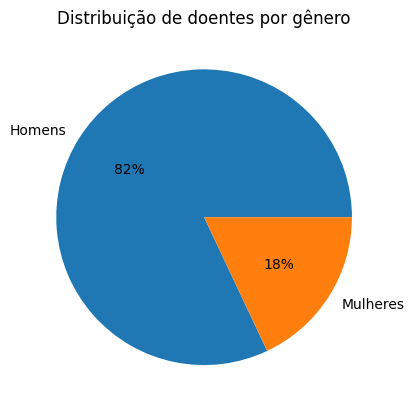

In [3]:
# filtra os indivíduos doentes
df_doentes = df[df['num'] > 0]

# quantifica os doentes do sexo masculino e feminino
genero = df_doentes['sex'].value_counts()

# cria um label para o atributo 'sex' correspondente
generos = ['Homens', 'Mulheres']

# Separa os indivíduos doentes pelo gênero
totais = [genero[1], genero[0]]

# define o título do gráfico
plt.title('Distribuição de doentes por gênero')

# cria o gráfico de pizza
plt.pie(totais, labels= generos, autopct='%1.0f%%')

# mostra o gráfico
plt.show()

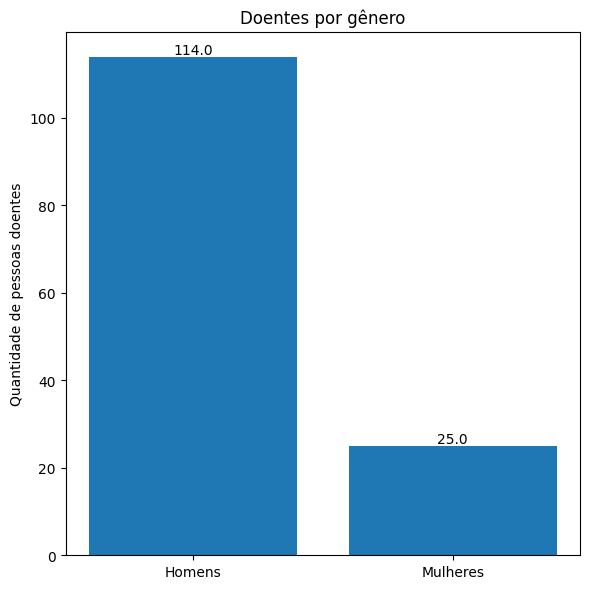

In [9]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 6 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (6, 6))

# Monta o gráfico de barras
ax.bar( x = generos, height = totais)

# Incluis os valores dos atributos sobre as barras
ax.bar_label(ax.containers[0], fmt="%.1f")

# Define o rótulo dos eixo y
# O rótulo do eixo x não se faz necessário haja vista que o título define
plt.ylabel('Quantidade de pessoas doentes')

# Inclui um título ao gráfico
plt.title('Doentes por gênero')

# Ajusta as margens do gráfico
plt.tight_layout()

# Mostra o gráfico
plt.show()

De acordo com os gráficos acima, o número de amostras que apresentam doença cardíaca é 139, sendo 114 homens (82%) e 25 mulheres (18%).

#####**Média da idade**

In [4]:
df_doentes['age'].mean()

np.float64(56.62589928057554)

A média de idade das pessoas que apresentaram doença cardíaca é 56 anos.

#####**Glicemia de jejum > 120 mg/DL.**

In [16]:
df_doentes_fbs = df_doentes[df_doentes['fbs'] > 0]
df_doentes_fbs['fbs'].value_counts()

,count
fbs,
1,22


Das 139 pessoas que apresentaram doença cardíaca, apenas 22 tinham glicemia > 120 mg/dL.

##### **Dor no peito**

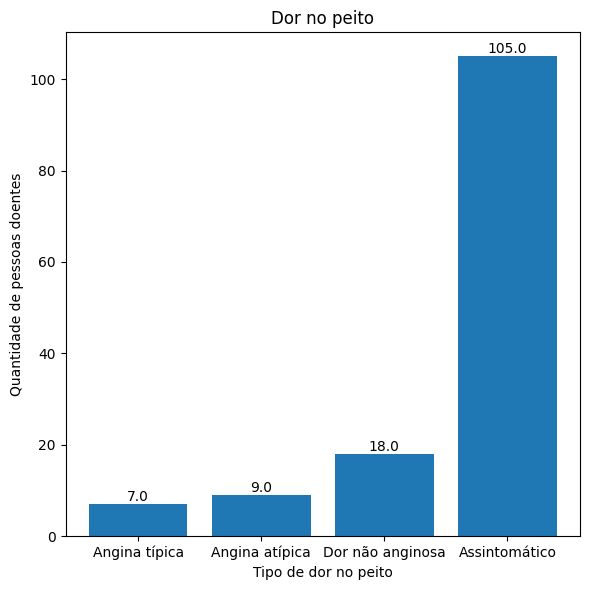

In [10]:
df_doente_dor = df_doentes[df_doentes['cp'] > 0]
dor = df_doente_dor['cp'].value_counts()
tipoDor = ['Angina típica', 'Angina atípica', 'Dor não anginosa', 'Assintomático']
valores = [dor[1], dor[2], dor[3], dor[4]]

# Prepara a figura (fig) e a área do gráfico (ax) com largura 6 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (6, 6))

# monta o gráfico de barras
ax.bar( x = tipoDor, height = valores)

# Incluis os valores dos atributos sobre as barras
ax.bar_label(ax.containers[0], fmt="%.1f")

# Define os rótulo dos eixos
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Quantidade de pessoas doentes')

# Mostra o gráfico
plt.title('Dor no peito')

# Ajusta as margens do gráfico
plt.tight_layout()

# Mostra o gráfico
plt.show()

Das 139 amostras que apresentam doença cardíaca, 105 não sentem nenhum tipo de dor no peito e somente 34 sentem algum tipo de dor.

###**Tratamento de valores nulos**

Podemos observar que as colunas dos atributos "ca" e "thal" contêm valores nulos.

In [65]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


As colunas 'ca' e 'thal' não apresentam dados significativos a validação das hipóteses desse projeto. Dessa forma, serão excluídas.

In [66]:
# Exclui as colunas que contêm valores nulos
df = df.drop('ca', axis=1)
df = df.drop('thal', axis=1)

# **Pré-processamento de dados**

### **Separação entre dados de treino e teste**

In [67]:
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
dados = df.values
X = dados[:,0:10] # atributos
y = dados[:,11] # classe (target)

# holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=seed, stratify=y)

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
scoring='neg_mean_squared_error'
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [68]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (212, 10)
Dimensões de X_test: (91, 10)
Dimensões de y_train: (212,)
Dimensões de y_test: (91,)


### **Normalização e padronização**

In [69]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
#models = []
results = []
names = []
pipelines = []

#Algorítmos
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())

# Preparando os modelos e adicionando-os na pipeline
pipelines.append(('Ridge',  Pipeline([ridge])))
pipelines.append(('Lasso',  Pipeline([lasso])))

In [70]:
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) # padronização do dataset
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) # normalização do dataset

# Montagem dos pipelines

# Dataset Padronizado
pipelines.append(('Ridge-padronizado', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padronizado', Pipeline([standard_scaler, lasso])))

# Dataset Normalizado
pipelines.append(('Ridge-normalizado', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-normalizado', Pipeline([min_max_scaler, lasso])))


# Avaliação dos modelos
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  # visualização do MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  res_metrics = "%s: (MSE) %0.2f (%0.2f) - (MSE) %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(res_metrics)



Ridge: (MSE) 0.98 (0.26) - (MSE) 0.99
Lasso: (MSE) 1.28 (0.25) - (MSE) 1.13
Ridge-padronizado: (MSE) 0.98 (0.26) - (MSE) 0.99
Lasso-padronizado: (MSE) 1.51 (0.13) - (MSE) 1.23
Ridge-normalizado: (MSE) 0.97 (0.25) - (MSE) 0.98
Lasso-normalizado: (MSE) 1.51 (0.13) - (MSE) 1.23


# **Conclusão**

As amostras presentes no dataset apresentaram dados numéricos claros e com desvio padrão regular. Os atrubutos são marcadores fisiológicos claros e pertencentes aos padrões característicos de pacientes que apresentam doenças cardíacas. Dados limpos e com poucos valores nulos  discrepantes.

**Validação das hipóteses levantadas:**

1. Das 303 amostras, 139 apresentaram doença cardíaca, sendo 82% do gênero masculino (114 amostras) e 18% do gênero feminino (25 amotras).

2. A média de idade das pessoas que apresentaram doença cardíaca é 56 anos.

3. Das 139 pessoas que apresentaram doença cardíaca, apenas 15,8% (22 pessoas) apresentaram glicemia de jejum > 120 mg/DL,logo a probabilidade de ser um marcado é relativamente pequena.

4. 105 pessoas não sentem e 34 pessoas sentem algum tipo de dor entre as pessoas que apresentaram doença cardíaca, sendo que somente 24,5% sentem algum tipo de dor.